## Aula 15: Avaliação do conjunto OOT

### Modelo FInal



```



==============================================================================================================
Model:                             Logit                           Pseudo R-squared:                0.159     
Dependent Variable:                y['default']                    AIC:                             13346.5452
Date:                              2021-03-26 12:41                BIC:                             13414.9056
No. Observations:                  14700                           Log-Likelihood:                  -6664.3   
Df Model:                          8                               LL-Null:                         -7923.7   
Df Residuals:                      14691                           LLR p-value:                     0.0000    
Converged:                         1.0000                          Scale:                           1.0000    
No. Iterations:                    6.0000                                                                     
--------------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                                     -0.9964   0.0741 -13.4536 0.0000 -1.1416 -0.8513
C(LIMIT_BAL, Treatment(reference=0))[T.[125000.00, inf)]      -0.3884   0.0644  -6.0283 0.0000 -0.5147 -0.2621
C(LIMIT_BAL, Treatment(reference=0))[T.[45000.00, 125000.00)] -0.2507   0.0630  -3.9763 0.0001 -0.3743 -0.1271
C(PAY_0, Treatment(reference=0))[T.[1]]                        0.8618   0.0637  13.5341 0.0000  0.7370  0.9866
C(PAY_0, Treatment(reference=0))[T.[6 5 8 4 2 3 7]]            2.4296   0.0621  39.1450 0.0000  2.3080  2.5513
C(PAY_AMT1, Treatment(reference=0))[T.[21.50, 4902.50)]       -0.2906   0.0598  -4.8606 0.0000 -0.4078 -0.1734
C(PAY_AMT1, Treatment(reference=0))[T.[4902.50, inf)]         -0.4409   0.0803  -5.4872 0.0000 -0.5984 -0.2834
C(AVG_PAY, Treatment(reference=0))[T.[10116.92, inf)]         -0.7438   0.0981  -7.5837 0.0000 -0.9360 -0.5516
C(AVG_PAY, Treatment(reference=0))[T.[2217.08, 10116.92)]     -0.3201   0.0549  -5.8319 0.0000 -0.4277 -0.2125
==============================================================================================================

```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Curso_Logistica/dataset_trat.csv',sep=';')
df.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,200510,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,200510,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,200510,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,200510,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,200510,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Transformações

In [3]:
df['AVG_PAY'] =  (df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6'])/ 6
df.loc[df['PAY_AMT1'] > 18006.25 , 'PAY_AMT1'] = 18006.25

### Manter apenas as variáveis finais no conjunto de dados

In [4]:
df=df[['ID','SAFRA','LIMIT_BAL','PAY_0','AVG_PAY','PAY_AMT1','default']]
df.head()

,ID,SAFRA,LIMIT_BAL,PAY_0,AVG_PAY,PAY_AMT1,default
0,1,200510,20000,2,114.833333,0.0,1
1,2,200510,120000,-1,833.333333,0.0,1
2,3,200510,90000,0,1836.333333,1518.0,0
3,4,200510,50000,0,1398.000000,2000.0,0
4,5,200510,50000,-1,9841.500000,2000.0,0


### Transformações Finais para cálculo do Score

In [5]:
df.loc[df['LIMIT_BAL'] < 45000.00 , 'LIMIT_BAL_trat'] = 0
df.loc[(df['LIMIT_BAL'] >= 45000.00) & (df['LIMIT_BAL'] < 125000.00), 'LIMIT_BAL_trat'] = -0.2507
df.loc[df['LIMIT_BAL'] >= 125000.00, 'LIMIT_BAL_trat'] = -0.3884

In [6]:
df['LIMIT_BAL_trat'].value_counts()

-0.3884    16188
-0.2507     9501
 0.0000     4311
Name: LIMIT_BAL_trat, dtype: int64

In [7]:
df.loc[df['PAY_AMT1'] < 21.50 , 'PAY_AMT1_trat'] = 0
df.loc[(df['PAY_AMT1'] >= 21.50) & (df['PAY_AMT1'] < 4902.50), 'PAY_AMT1_trat'] = -0.2906
df.loc[df['PAY_AMT1'] >= 4902.50, 'PAY_AMT1_trat'] = -0.4409


In [8]:
df['PAY_AMT1_trat'].value_counts()

-0.2906    16255
-0.4409     8334
 0.0000     5411
Name: PAY_AMT1_trat, dtype: int64

In [9]:
df.loc[df['AVG_PAY'] < 2217.08 , 'AVG_PAY_trat'] = 0
df.loc[(df['AVG_PAY'] >= 2217.08) & (df['AVG_PAY'] < 10116.92), 'AVG_PAY_trat'] = -0.3201
df.loc[df['AVG_PAY'] >= 10116.92, 'AVG_PAY_trat'] = -0.7438

In [10]:
df['AVG_PAY_trat'].value_counts()

 0.0000    14316
-0.3201    11982
-0.7438     3702
Name: AVG_PAY_trat, dtype: int64

In [11]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [12]:
df.loc[df['PAY_0']   < 1  , 'PAY_0_trat'] = 0
df.loc[df['PAY_0'] == 1, 'PAY_0_trat'] = 0.8618
df.loc[df['PAY_0']   > 1  , 'PAY_0_trat'] = 2.4296

In [13]:
df['PAY_0_trat'].value_counts()

0.0000    23182
0.8618     3688
2.4296     3130
Name: PAY_0_trat, dtype: int64

In [14]:
df['Intercept'] = -0.9964

In [15]:
df.head()

,ID,SAFRA,LIMIT_BAL,PAY_0,AVG_PAY,PAY_AMT1,default,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,Intercept
0,1,200510,20000,2,114.833333,0.0,1,0.0000,0.0000,0.0000,2.4296,-0.9964
1,2,200510,120000,-1,833.333333,0.0,1,-0.2507,0.0000,0.0000,0.0000,-0.9964
2,3,200510,90000,0,1836.333333,1518.0,0,-0.2507,-0.2906,0.0000,0.0000,-0.9964
3,4,200510,50000,0,1398.000000,2000.0,0,-0.2507,-0.2906,0.0000,0.0000,-0.9964
4,5,200510,50000,-1,9841.500000,2000.0,0,-0.2507,-0.2906,-0.3201,0.0000,-0.9964


In [16]:
df=df[['ID','SAFRA','default','Intercept','LIMIT_BAL_trat', 'PAY_AMT1_trat','AVG_PAY_trat','PAY_0_trat']]

In [17]:
df.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat
0,1,200510,1,-0.9964,0.0000,0.0000,0.0000,2.4296
1,2,200510,1,-0.9964,-0.2507,0.0000,0.0000,0.0000
2,3,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000
3,4,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000
4,5,200510,0,-0.9964,-0.2507,-0.2906,-0.3201,0.0000


## Predição

In [18]:
df['pred_lin'] = df['Intercept'] +	df['LIMIT_BAL_trat'] +	df['PAY_AMT1_trat']	+ df['AVG_PAY_trat'] +	df['PAY_0_trat'] 

In [19]:
df.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,pred_lin
0,1,200510,1,-0.9964,0.0000,0.0000,0.0000,2.4296,1.4332
1,2,200510,1,-0.9964,-0.2507,0.0000,0.0000,0.0000,-1.2471
2,3,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377
3,4,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377
4,5,200510,0,-0.9964,-0.2507,-0.2906,-0.3201,0.0000,-1.8578


In [20]:
import numpy as np
df['score'] = 1 / (1 + np.exp(-df['pred_lin']))

In [21]:
df.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,pred_lin,score
0,1,200510,1,-0.9964,0.0000,0.0000,0.0000,2.4296,1.4332,0.807399
1,2,200510,1,-0.9964,-0.2507,0.0000,0.0000,0.0000,-1.2471,0.223203
2,3,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377,0.176870
3,4,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377,0.176870
4,5,200510,0,-0.9964,-0.2507,-0.2906,-0.3201,0.0000,-1.8578,0.134960


In [22]:
df['score'].describe()

count    30000.000000
mean         0.224305
std          0.181160
min          0.071127
25%          0.118355
50%          0.157706
75%          0.216361
max          0.807399
Name: score, dtype: float64

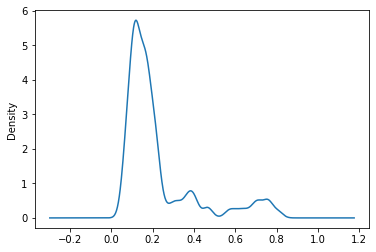

In [23]:
df['score'].plot(kind='density') 

### Separar os dataframes para testes 

In [24]:
OOT = df.loc[df['SAFRA'] >= 200605 ]
OOT['SAFRA'].groupby(OOT['SAFRA']).count()

SAFRA
200605    3000
200606    3000
200607    3000
Name: SAFRA, dtype: int64

In [25]:
OOT.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,pred_lin,score
21000,21001,200605,0,-0.9964,0.0000,-0.2906,0.0000,0.8618,-0.4252,0.395273
21001,21002,200605,1,-0.9964,-0.3884,-0.4409,-0.3201,2.4296,0.2838,0.570478
21002,21003,200605,0,-0.9964,-0.3884,-0.2906,-0.3201,0.0000,-1.9955,0.119676
21003,21004,200605,1,-0.9964,-0.3884,-0.4409,0.0000,2.4296,0.6039,0.646548
21004,21005,200605,1,-0.9964,-0.2507,-0.2906,-0.3201,2.4296,0.5718,0.639178


In [30]:
DEV = df.loc[df['SAFRA'] < 200605 ]
DEV['SAFRA'].groupby(DEV['SAFRA']).count()

SAFRA
200510    3000
200511    3000
200512    3000
200601    3000
200602    3000
200603    3000
200604    3000
Name: SAFRA, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(DEV ,test_size=0.3, random_state=123)

In [32]:
X_train.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,pred_lin,score
10910,10911,200601,1,-0.9964,-0.3884,-0.4409,-0.3201,0.0000,-2.1458,0.104724
12563,12564,200602,0,-0.9964,-0.3884,-0.2906,0.0000,0.0000,-1.6754,0.157706
369,370,200510,1,-0.9964,0.0000,0.0000,0.0000,2.4296,1.4332,0.807399
7702,7703,200512,0,-0.9964,-0.3884,-0.2906,-0.3201,0.0000,-1.9955,0.119676
7464,7465,200512,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377,0.176870


In [33]:
X_train['fx_score']    = pd.qcut(X_train['score'], 5 , labels = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
X_train['fx_score'].value_counts()

2    3474
0    3228
4    2891
1    2723
3    2384
Name: fx_score, dtype: int64

### Cálculo KS2

In [44]:
from scipy import stats

stats.ks_2samp(X_train['score'].loc[X_train['default'] == 1], X_train['score'].loc[X_train['default'] == 0])


Ks_2sampResult(statistic=0.38614003199730923, pvalue=0.0)

In [45]:
stats.ks_2samp(X_test['score'].loc[X_test['default'] == 1], X_test['score'].loc[X_test['default'] == 0])

Ks_2sampResult(statistic=0.3780044017660223, pvalue=8.393085718670753e-137)

In [46]:
stats.ks_2samp(OOT['score'].loc[OOT['default'] == 1], OOT['score'].loc[OOT['default'] == 0])

Ks_2sampResult(statistic=0.4034096429438912, pvalue=2.4238004152500856e-207)

In [41]:
df.to_csv('/content/drive/MyDrive/Curso_Logistica/df_escorado.csv',index=None)


### Calculo KS1

In [47]:
stats.ks_2samp(df['score'].loc[df['SAFRA'] >= 200605], df['score'].loc[df['SAFRA'] < 200605])

Ks_2sampResult(statistic=0.05895238095238098, pvalue=1.920211576415336e-19)